In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("student_performance.csv")
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [3]:
features = ["weekly_self_study_hours", "attendance_percentage", "class_participation"]

X = df[features]
X.head()


,weekly_self_study_hours,attendance_percentage,class_participation
0,18.5,95.6,3.8
1,14.0,80.0,2.5
2,19.5,86.3,5.3
3,25.7,70.2,7.0
4,13.4,81.9,6.9


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


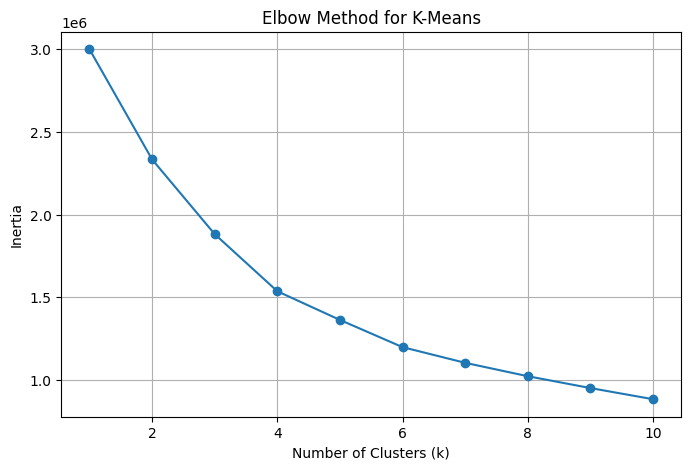

In [5]:
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.grid()
plt.show()


In [6]:
k = 4   # ← Set this based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [7]:
df["cluster"] = kmeans.labels_
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,cluster
0,1,18.5,95.6,3.8,97.9,A,1
1,2,14.0,80.0,2.5,83.9,B,1
2,3,19.5,86.3,5.3,100.0,A,2
3,4,25.7,70.2,7.0,100.0,A,3
4,5,13.4,81.9,6.9,92.0,A,0


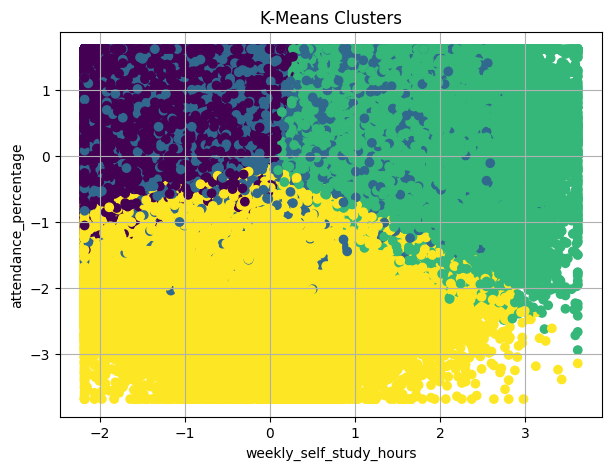

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("K-Means Clusters")
plt.grid()
plt.show()


In [9]:
kmeans.cluster_centers_
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_original


array([[ 9.31686364, 89.65436315,  7.25083993],
       [14.46504178, 88.45734253,  3.76477614],
       [22.47540955, 87.48634284,  6.86388512],
       [14.00330875, 72.97696427,  6.04504195]])

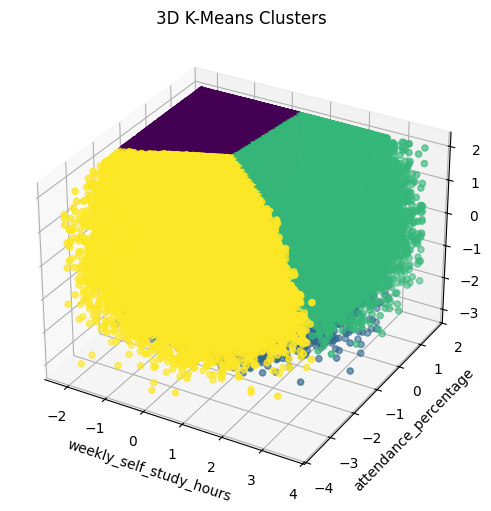

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
    c=kmeans.labels_, cmap='viridis'
)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("3D K-Means Clusters")

plt.show()


In [12]:
df.to_csv("student_clusters.csv", index=False)
print("Saved clustered dataset to student_clusters.csv")


Saved clustered dataset to student_clusters.csv
